# Trabalhando com datasets desbalanceados

Neste exemplo serão mostradas técnicas para análise e balanceamento de conjuntos de dados desbalanceados

- Vamos começar usando uma base simples para entender os conceitos
- Incialmente faremos uma análise do conjunto de dados da base
- Para trabalhar com datasets desbalanceados, vamos utilizar a biblioteca **imbalanced-learn**

In [2]:
# importando a base
import pandas as pd
ARQUIVO = 'dados/BaseInadimplencia.xlsx'
base = pd.read_excel(ARQUIVO)

In [4]:
# Visualizando essa base
base.head(3)

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-1.992492,-4.158429,0
2,-3.910816,-0.874096,0


In [6]:
# contando a quantidade de valores
base.Situacao.value_counts()

Situacao
0    150
1     15
Name: count, dtype: int64

<Axes: ylabel='count'>

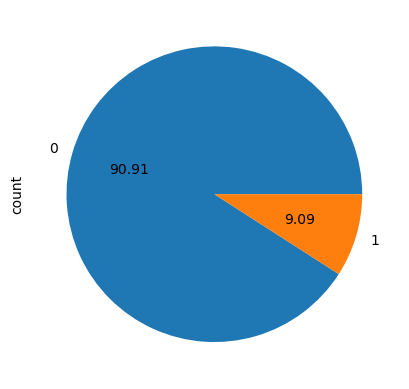

In [8]:
# Visualizando os dados graficamente
base.Situacao.value_counts().plot.pie(autopct='%.2f')

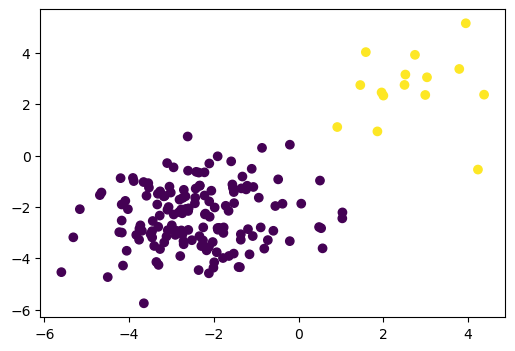

In [16]:
# Visualizando a distribuição dos dados
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)

plt.show()

## Como podemos resolver esse problema?

- temos 2 classes:
- **Classe Majoritária**: a que possui mais registros
- **Classe Minoritária**: a que possui menos registros

- undersampling: reduzir a classe majoritária
- oversampling: aumentar a classe minotitária (perigo de overfitting)

In [22]:
# Instalando a biblioteca
!pip install -U imbalanced-learn

## Reduzindo os registros da classe majoritária
- vamos retirar dados da classe que possui mais registros
    - precisamos ter cuidado para que essa retirada não acabe causando perda de informação (retirando informações que são muito importantes)
    - também é necessário verificar o tamnho da base restante
- podemos começar fazendo isso excluindo registros de forma aleatória com o **RandomUnderSampler**



In [36]:
# Sepandando X e y
X = base.drop('Situacao', axis=1)
y = base.Situacao

In [42]:
# Definindo o RandonUnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)


In [44]:
# Definindo a nova amostra
X_res, y_res = rus.fit_resample(X,y)

In [46]:
# Contando os valores
y_res.value_counts()

Situacao
0    15
1    15
Name: count, dtype: int64

<Axes: ylabel='count'>

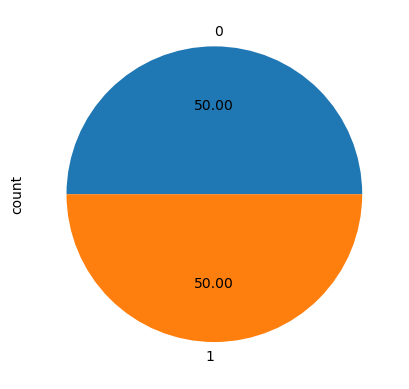

In [50]:
# visualizando graficamente
y_res.value_counts().plot.pie(autopct='%.2f')

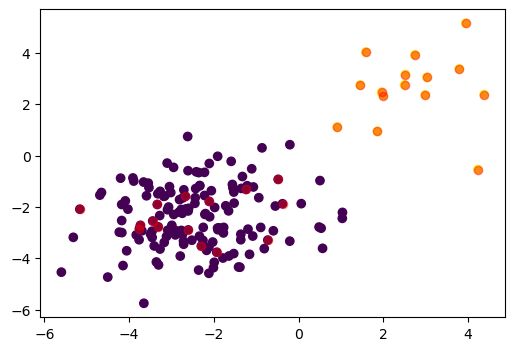

In [56]:
# Visualizando a distribuição dos dados
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red', alpha=0.4)

plt.show()

- podemos tambem substituir um conjunto de amostras (um cluester) pelo seu centróide utilizando o **ClusterCentroids**

In [82]:
# importação

from imblearn.under_sampling import ClusterCentroids

In [84]:
# definindo o ClusterCentroids
cc = ClusterCentroids(random_state=42)

In [86]:
# criando a amostra dos dados
X_res, y_res = cc.fit_resample(X,y)

C:\Users\Anderson\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


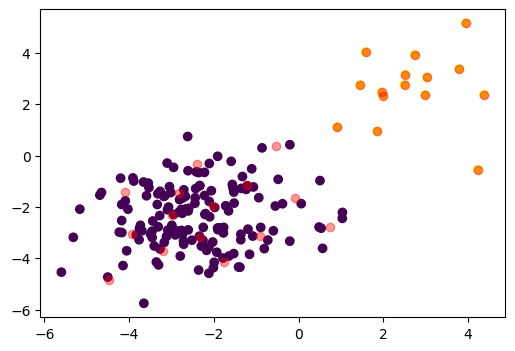

In [88]:
# visualizando graficamente
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red', alpha=0.4)

plt.show()

- ou utilizar o **NearMiss** para manter apenas os pontos com **Menor distancia aos pontos da classe minoritária**
    - Nesse caso, vai retirar os pontos mas continuar mantendo a região de separação entre as classes

In [94]:
# fazendo a reamostragem utilizando o NearMiss
from imblearn.under_sampling import NearMiss


In [98]:
# Definindo o NearMiss
nm = NearMiss()

In [102]:
# criando a amostra dos dados
X_res, y_res = nm.fit_resample(X,y)

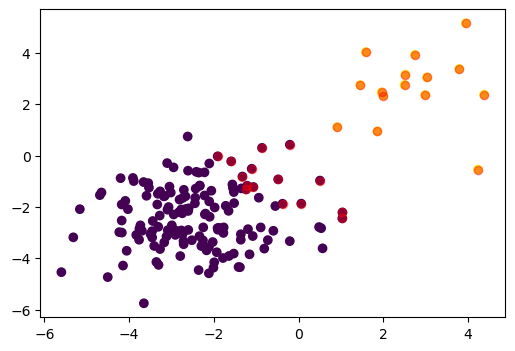

In [104]:
# visualizando graficamente
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red', alpha=0.4)

plt.show()


- existem varias outras formas de fazermos o undersampling e todas elas são explicadas na própria documentação

## Aumentando os registros da classe minoritária
- podemos **gerar novos valores** baseado nos atuais registros da base de dados, seja apenas duplicando os valores ou utilizando outros métodos como o KNN para criar novos pontos
    - precisamos garantir que não vamos ter overfitting por mostrar ao modelo várias vezes dados semelhantes
- podemos começar gerando os registros de forma aleatória com o RandomOverSampler


In [132]:
# importando
from imblearn.over_sampling import RandomOverSampler

In [136]:
# definindo o RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [138]:
# Refazendo nossa amostra
X_res, y_res = ros.fit_resample(X,y)

In [140]:
# Contando os valores
y_res.value_counts()

Situacao
0    150
1    150
Name: count, dtype: int64

<Axes: ylabel='count'>

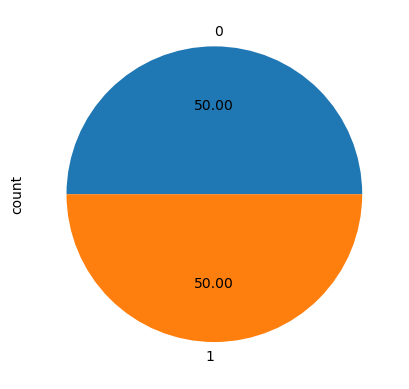

In [142]:
# Visualizando graficamente
y_res.value_counts().plot.pie(autopct='%.2f')

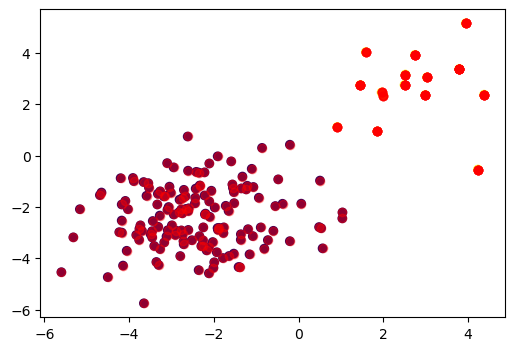

In [153]:
# visualizando graficamente
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red', alpha=0.4)

plt.show()


#### Se a repetição dos dados for um problema, podemos utilizar o parametro shrinkage
- quando o parametro for passado, ele vai gerar uma "suavização" nos dados

In [157]:
# definindo o ros
ros = RandomOverSampler(random_state=42, shrinkage=0.5)

In [159]:
# Refazendo nossa amostra
X_res, y_res = ros.fit_resample(X,y)


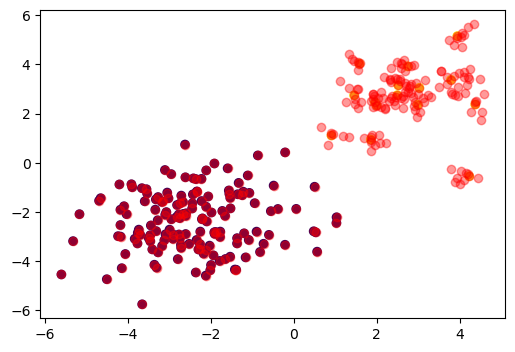

In [161]:
# visualizando graficamente
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red', alpha=0.4)

plt.show()



- outra opção é utilizarmos o SMOTE ou ADASYN, quye vai utilizar o KNN para gerar novos registros em uma distência açeatória entre o ponto de dado e um dos seus k vizinhos mais próximos
    - enquanto o SMOTE vai considerar todos os pontos sem distinção, o ADASYN vai gerar mais observações para aqueles pontos da classe minoritária que tiverem mais observações da classe majoritária na região dos vizinhos mais próximos


In [164]:
# utilizando o SMOTE
from imblearn.over_sampling import SMOTE
s= SMOTE(random_state=42)
X_res, y_res = s.fit_resample(X,y)


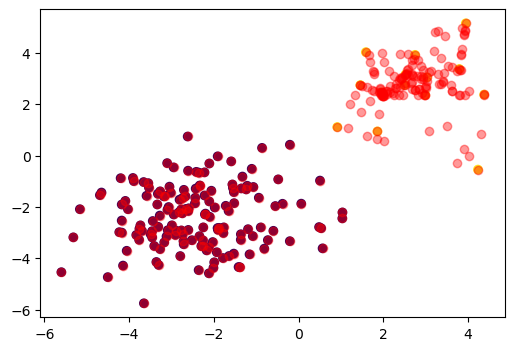

In [166]:
# visualizando graficamente
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red', alpha=0.4)

plt.show()

In [168]:
# utilizando o ADASYN
from imblearn.over_sampling import ADASYN
a= ADASYN(random_state=42)
X_res, y_res = a.fit_resample(X,y)


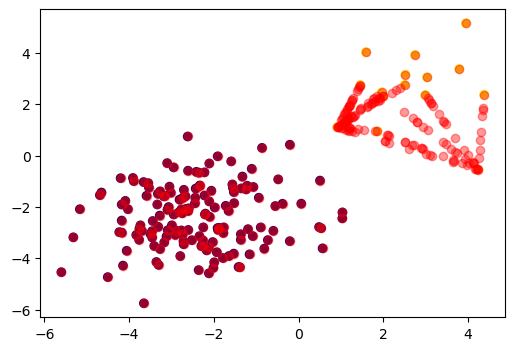

In [170]:
# visualizando graficamente
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red', alpha=0.4)

plt.show()

### Considerações Finais:

- Existem outras formas de fazer o oversampling 
- Todas são explicadas na documentação


### Proximos passos:
- Utilizar essas tecnicas na base de fraudes de cartões de crédito do kaggle
